  <a href="https://colab.research.google.com/github/marcpalo1999/MIA_sanidad/blob/main/2_1_introduccion_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  # Setup - copy data from github to collab

In [ ]:
import os
if not os.path.exists('/content/MIA_sanidad'):
    !git clone https://github.com/marcpalo1999/MIA_sanidad.git
os.chdir('/content/MIA_sanidad')
os.getcwd()


  # Introducci√≥n a Pandas con un Dataset M√©dico



  En este notebook vamos a aprender a usar `pandas` para:



  1. Cargar un dataset en un DataFrame

  2. Inspeccionar datos (ver filas, columnas, tipos)

  3. Seleccionar y filtrar datos

  4. Crear y transformar columnas

  5. Hacer una exploraci√≥n inicial b√°sica

  6. Trabajar con valores nulos

  7. Agrupar y resumir informaci√≥n

  8. Visualizaci√≥n b√°sica con pandas

  9. Guardar los resultados

In [3]:
# Importar las librer√≠as necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [67]:
# Cargar el dataset
df = pd.read_csv("./data/heart_disease_dataset.csv")
df


age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   1       145   233    1        2      150      0      2.3   
1     67    1   4       160   286    0        2      108      1      1.5   
2     67    1   4       120   229    0        2      129      1      2.6   
3     37    1   3       130   250    0        0      187      0      3.5   
4     41    0   2       130   204    0        2      172      0      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   45    1   1       110   264    0        0      132      0      1.2   
299   68    1   4       144   193    1        0      141      0      3.4   
300   57    1   4       130   131    0        0      115      1      1.2   
301   57    0   2       130   236    0        2      174      0      0.0   
302   38    1   3       138   175    0        0      173      0      0.0   

     slope   ca  thal  num  
0        3  0.0   6.0    0  
1        2  3.0   3.0    2  
2        2  2.0   7.0    1  
3        3  0.0   3.0    0  
4        1  0.0   3.0    0  
..     ...  ...   ...  ...  
298      2  0.0   7.0    1  
299      2  2.0   7.0    2  
300      2  1.0   7.0    3  
301      2  1.0   3.0    1  
302      1  NaN   3.0    0  

[303 rows x 14 columns]

  ## Contexto del dataset



  Origen: https://archive.ics.uci.edu/dataset/45/heart+disease



  Este dataset contiene informaci√≥n m√©dica de pacientes y su relaci√≥n con enfermedades card√≠acas.

  Las principales variables son:



  - `age`: Edad del paciente

  - `sex`: Sexo (0 = Mujer, 1 = Hombre)

  - `cp`: Tipo de dolor en el pecho (1-4)

  - `trestbps`: Presi√≥n arterial en reposo (mm Hg)

  - `chol`: Colesterol s√©rico en mg/dl

  - `fbs`: Glucosa en ayunas > 120 mg/dl (1 = verdadero; 0 = falso)

  - `restecg`: Resultados electrocardiogr√°ficos en reposo

  - `thalach`: Frecuencia card√≠aca m√°xima alcanzada

  - `exang`: Angina inducida por ejercicio (1 = s√≠; 0 = no)

  - `oldpeak`: Depresi√≥n ST inducida por ejercicio

  - `slope`: Pendiente del segmento ST

  - `ca`: N√∫mero de vasos principales coloreados por fluoroscopia (0-3)

  - `thal`: 3 = normal; 6 = defecto fijo; 7 = defecto reversible

  - `num`: Diagn√≥stico de enfermedad card√≠aca (0 = No, 1-4 = S√≠)

  ## 1. Inspecci√≥n b√°sica del DataFrame



  Lo primero que hacemos siempre es conocer nuestros datos.

In [68]:
# Ver las primeras filas
df.head()


age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  num  
0  0.0   6.0    0  
1  3.0   3.0    2  
2  2.0   7.0    1  
3  0.0   3.0    0  
4  0.0   3.0    0

In [69]:
# Tambi√©n podemos ver las √∫ltimas filas
df.tail(3)


age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
300   57    1   4       130   131    0        0      115      1      1.2   
301   57    0   2       130   236    0        2      174      0      0.0   
302   38    1   3       138   175    0        0      173      0      0.0   

     slope   ca  thal  num  
300      2  1.0   7.0    3  
301      2  1.0   3.0    1  
302      1  NaN   3.0    0

In [70]:
# Ver una muestra aleatoria de datos
df.sample(5)


age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
10    57    1   4       140   192    0        0      148      0      0.4   
80    45    1   4       104   208    0        2      148      1      3.0   
147   41    1   3       112   250    0        0      179      0      0.0   
293   63    1   4       140   187    0        2      144      1      4.0   
288   56    1   2       130   221    0        2      163      0      0.0   

     slope   ca  thal  num  
10       2  0.0   6.0    0  
80       2  0.0   3.0    0  
147      1  0.0   3.0    0  
293      1  2.0   7.0    2  
288      1  0.0   7.0    0

In [71]:
# Dimensiones del DataFrame
df.shape


(303, 14)

In [72]:
f"El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas"


'El dataset tiene 303 filas y 14 columnas'

In [73]:
# Ver los nombres de las columnas
df.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [74]:
# Tipos de datos de cada columna
df.dtypes


age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal        float64
num           int64
dtype: object

In [75]:
# Informaci√≥n general del DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [76]:
# Resumen estad√≠stico r√°pido
df.describe()


age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  299.000000   
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.672241   
std      0.994971   22.875003    0.469794    1.161075    0.616226    0.937438   
min      0.000000   71.000000    0.000000    0.000000    1.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    2.000000    0.000000   
75%      2.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    3.000000    3.000000   

             thal         num  
count  301.000000  303.000000  
mean     4.734219    0.937294  
std      1.939706    1.228536  
min      3.000000    0.000000  
25%      3.000000    0.000000  
50%      3.000000    0.000000  
75%      7.000000    2.000000  
max      7.000000    4.000000

In [77]:
# Tambi√©n podemos incluir variables categ√≥ricas
df.describe(include='all')


age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  299.000000   
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.672241   
std      0.994971   22.875003    0.469794    1.161075    0.616226    0.937438   
min      0.000000   71.000000    0.000000    0.000000    1.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    2.000000    0.000000   
75%      2.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    3.000000    3.000000   

             thal         num  
count  301.000000  303.000000  
mean     4.734219    0.937294  
std      1.939706    1.228536  
min      3.000000    0.000000  
25%      3.000000    0.000000  
50%      3.000000    0.000000  
75%      7.000000    2.000000  
max      7.000000    4.000000

  ## 2. Seleccionar columnas y filas



  Pandas ofrece varias formas de acceder a los datos.

In [78]:
# Seleccionar una columna (devuelve una Serie)
df["age"].head(10)


0    63
1    67
2    67
3    37
4    41
5    56
6    62
7    57
8    63
9    53
Name: age, dtype: int64

In [79]:
# Otra forma de seleccionar una columna (notaci√≥n de punto)
df.chol.head()


0    233
1    286
2    229
3    250
4    204
Name: chol, dtype: int64

In [80]:
# Seleccionar varias columnas (devuelve un DataFrame)
subset = df[["age", "sex", "chol", "num"]]
subset.head()


age  sex  chol  num
0   63    1   233    0
1   67    1   286    2
2   67    1   229    1
3   37    1   250    0
4   41    0   204    0

In [81]:
# Seleccionar filas por posici√≥n con iloc
df.iloc[0]


age          63.0
sex           1.0
cp            1.0
trestbps    145.0
chol        233.0
fbs           1.0
restecg       2.0
thalach     150.0
exang         0.0
oldpeak       2.3
slope         3.0
ca            0.0
thal          6.0
num           0.0
Name: 0, dtype: float64

In [82]:
# Seleccionar un rango de filas
df.iloc[5:10]


age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
5   56    1   2       120   236    0        0      178      0      0.8      1   
6   62    0   4       140   268    0        2      160      0      3.6      3   
7   57    0   4       120   354    0        0      163      1      0.6      1   
8   63    1   4       130   254    0        2      147      0      1.4      2   
9   53    1   4       140   203    1        2      155      1      3.1      3   

    ca  thal  num  
5  0.0   3.0    0  
6  2.0   3.0    3  
7  0.0   3.0    0  
8  1.0   7.0    2  
9  0.0   7.0    1

In [83]:
# Seleccionar filas y columnas espec√≠ficas con iloc
df.iloc[0:3, 0:4]


age  sex  cp  trestbps
0   63    1   1       145
1   67    1   4       160
2   67    1   4       120

In [84]:
# Seleccionar con loc usando etiquetas
df.loc[0:2, ["age", "sex", "chol"]]


age  sex  chol
0   63    1   233
1   67    1   286
2   67    1   229

  ## 3. Filtrar datos



  Una de las operaciones m√°s comunes es filtrar filas seg√∫n condiciones.

In [85]:
# Filtrar pacientes mayores de 60 a√±os
mayores_60 = df[df["age"] > 60]
len(mayores_60)


79

In [86]:
mayores_60.head()


age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
6   62    0   4       140   268    0        2      160      0      3.6      3   
8   63    1   4       130   254    0        2      147      0      1.4      2   

    ca  thal  num  
0  0.0   6.0    0  
1  3.0   3.0    2  
2  2.0   7.0    1  
6  2.0   3.0    3  
8  1.0   7.0    2

In [87]:
# Filtrar con m√∫ltiples condiciones - Mujeres mayores de 50 a√±os
mujeres_mayores = df[(df["sex"] == 0) & (df["age"] > 50)]
len(mujeres_mayores)


70

In [88]:
mujeres_mayores.head()


age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
6    62    0   4       140   268    0        2      160      0      3.6   
7    57    0   4       120   354    0        0      163      1      0.6   
11   56    0   2       140   294    0        2      153      0      1.3   
21   58    0   1       150   283    1        2      162      0      1.0   
26   58    0   3       120   340    0        0      172      0      0.0   

    slope   ca  thal  num  
6       3  2.0   3.0    3  
7       1  0.0   3.0    0  
11      2  0.0   3.0    0  
21      1  0.0   3.0    0  
26      1  0.0   3.0    0

In [26]:
# Usar el operador OR (|) - Pacientes con colesterol alto o presi√≥n alta
alto_riesgo = df[(df["chol"] > 240) | (df["trestbps"] > 140)]
len(alto_riesgo)


181

In [27]:
# Filtrar usando isin() para m√∫ltiples valores
dolor_especifico = df[df["cp"].isin([1, 2])]
len(dolor_especifico)


73

In [28]:
# Filtrar usando query() - m√°s legible para condiciones complejas
resultado = df.query("age > 50 and chol > 200 and sex == 1")
len(resultado)


120

In [29]:
resultado.head()


age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
5   56    1   2       120   236    0        0      178      0      0.8      1   
8   63    1   4       130   254    0        2      147      0      1.4      2   

    ca  thal  num  
0  0.0   6.0    0  
1  3.0   3.0    2  
2  2.0   7.0    1  
5  0.0   3.0    0  
8  1.0   7.0    2

  ## 4. Crear y modificar columnas



  Es com√∫n necesitar crear nuevas variables o transformar las existentes.

In [30]:
# Crear una columna simple
df["edad_en_meses"] = df["age"] * 12
df[["age", "edad_en_meses"]].head()


age  edad_en_meses
0   63            756
1   67            804
2   67            804
3   37            444
4   41            492

In [31]:
# Crear columna con operaciones entre columnas
df["indice_riesgo"] = df["chol"] / df["age"]
df[["age", "chol", "indice_riesgo"]].head()


age  chol  indice_riesgo
0   63   233       3.698413
1   67   286       4.268657
2   67   229       3.417910
3   37   250       6.756757
4   41   204       4.975610

In [32]:
# Crear columna categ√≥rica basada en valores continuos
df["grupo_edad"] = pd.cut(df["age"], 
                          bins=[0, 40, 50, 60, 70, 100],
                          labels=["<40", "40-49", "50-59", "60-69", "70+"])
df["grupo_edad"].value_counts()


grupo_edad
50-59    130
40-49     76
60-69     73
<40       18
70+        6
Name: count, dtype: int64

In [33]:
# Usar apply() para transformaciones m√°s complejas
def clasificar_colesterol(valor):
    if pd.isna(valor):
        return "Desconocido"
    elif valor < 200:
        return "Normal"
    elif valor < 240:
        return "L√≠mite alto"
    else:
        return "Alto"

df["categoria_colesterol"] = df["chol"].apply(clasificar_colesterol)
df["categoria_colesterol"].value_counts()


categoria_colesterol
Alto           156
L√≠mite alto     98
Normal          49
Name: count, dtype: int64

In [34]:
# Crear columna usando numpy.where
df["sexo_texto"] = np.where(df["sex"] == 0, "Mujer", "Hombre")
df[["sex", "sexo_texto"]].head()


sex sexo_texto
0    1     Hombre
1    1     Hombre
2    1     Hombre
3    1     Hombre
4    0      Mujer

In [35]:
# Mapear valores usando un diccionario
mapeo_enfermedad = {0: "Sin enfermedad", 1: "Leve", 2: "Moderada", 3: "Severa", 4: "Muy severa"}
df["nivel_enfermedad"] = df["num"].map(mapeo_enfermedad)
df[["num", "nivel_enfermedad"]].head(10)


num nivel_enfermedad
0    0   Sin enfermedad
1    2         Moderada
2    1             Leve
3    0   Sin enfermedad
4    0   Sin enfermedad
5    0   Sin enfermedad
6    3           Severa
7    0   Sin enfermedad
8    2         Moderada
9    1             Leve

In [36]:
# Modificar columna existente - Normalizar el colesterol
df["chol_normalizado"] = (df["chol"] - df["chol"].min()) / (df["chol"].max() - df["chol"].min())
df[["chol", "chol_normalizado"]].describe()


chol  chol_normalizado
count  303.000000        303.000000
mean   246.693069          0.275555
std     51.776918          0.118212
min    126.000000          0.000000
25%    211.000000          0.194064
50%    241.000000          0.262557
75%    275.000000          0.340183
max    564.000000          1.000000

  ## 5. Exploraci√≥n y an√°lisis b√°sico



  Vamos a explorar los datos para entender mejor el dataset.

In [37]:
# Contar valores √∫nicos en una columna
df["num"].value_counts()


num
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64

In [38]:
# Porcentajes en lugar de conteos
df["num"].value_counts(normalize=True) * 100


num
0    54.125413
1    18.151815
2    11.881188
3    11.551155
4     4.290429
Name: proportion, dtype: float64

In [39]:
# Tabla cruzada entre dos variables
pd.crosstab(df["sexo_texto"], df["nivel_enfermedad"])


nivel_enfermedad  Leve  Moderada  Muy severa  Severa  Sin enfermedad
sexo_texto                                                          
Hombre              46        29          11      28              92
Mujer                9         7           2       7              72

In [40]:
# Tabla cruzada con porcentajes por fila
pd.crosstab(df["sexo_texto"], df["nivel_enfermedad"], normalize=0) * 100


nivel_enfermedad       Leve   Moderada  Muy severa     Severa  Sin enfermedad
sexo_texto                                                                   
Hombre            22.330097  14.077670    5.339806  13.592233       44.660194
Mujer              9.278351   7.216495    2.061856   7.216495       74.226804

In [41]:
# Tabla cruzada con porcentajes por columna
pd.crosstab(df["sexo_texto"], df["nivel_enfermedad"], normalize=1) * 100


nivel_enfermedad       Leve   Moderada  Muy severa  Severa  Sin enfermedad
sexo_texto                                                                
Hombre            83.636364  80.555556   84.615385    80.0       56.097561
Mujer             16.363636  19.444444   15.384615    20.0       43.902439

  ## 6. Trabajar con valores nulos



  El manejo de valores faltantes es crucial en el an√°lisis de datos.

In [42]:
# Detectar valores nulos
df.isnull().sum()


age                     0
sex                     0
cp                      0
trestbps                0
chol                    0
fbs                     0
restecg                 0
thalach                 0
exang                   0
oldpeak                 0
slope                   0
ca                      4
thal                    2
num                     0
edad_en_meses           0
indice_riesgo           0
grupo_edad              0
categoria_colesterol    0
sexo_texto              0
nivel_enfermedad        0
chol_normalizado        0
dtype: int64

In [43]:
# Porcentaje de valores nulos
(df.isnull().sum() / len(df)) * 100


age                     0.000000
sex                     0.000000
cp                      0.000000
trestbps                0.000000
chol                    0.000000
fbs                     0.000000
restecg                 0.000000
thalach                 0.000000
exang                   0.000000
oldpeak                 0.000000
slope                   0.000000
ca                      1.320132
thal                    0.660066
num                     0.000000
edad_en_meses           0.000000
indice_riesgo           0.000000
grupo_edad              0.000000
categoria_colesterol    0.000000
sexo_texto              0.000000
nivel_enfermedad        0.000000
chol_normalizado        0.000000
dtype: float64

In [44]:
# Filas con alg√∫n valor nulo
filas_con_nulos = df[df.isnull().any(axis=1)]
len(filas_con_nulos)


6

In [45]:
filas_con_nulos.head()


age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  ...  \
87    53    0   3       128   216    0        2      115      0      0.0  ...   
166   52    1   3       138   223    0        0      169      0      0.0  ...   
192   43    1   4       132   247    1        2      143      1      0.1  ...   
266   52    1   4       128   204    1        0      156      1      1.0  ...   
287   58    1   2       125   220    0        0      144      0      0.4  ...   

      ca  thal  num  edad_en_meses  indice_riesgo  grupo_edad  \
87   0.0   NaN    0            636       4.075472       50-59   
166  NaN   3.0    0            624       4.288462       50-59   
192  NaN   7.0    1            516       5.744186       40-49   
266  0.0   NaN    2            624       3.923077       50-59   
287  NaN   7.0    0            696       3.793103       50-59   

    categoria_colesterol sexo_texto nivel_enfermedad chol_normalizado  
87           L√≠mite alto      Mujer   Sin enfermedad         0.205479  
166          L√≠mite alto     Hombre   Sin enfermedad         0.221461  
192                 Alto     Hombre             Leve         0.276256  
266          L√≠mite alto     Hombre         Moderada         0.178082  
287          L√≠mite alto     Hombre   Sin enfermedad         0.214612  

[5 rows x 21 columns]

In [46]:
# Crear una copia para no modificar el original
df_limpio = df.copy()

# Eliminar filas con nulos
df_sin_nulos = df_limpio.dropna()
f"Filas antes: {len(df_limpio)}, despu√©s: {len(df_sin_nulos)}"


'Filas antes: 303, despu√©s: 297'

In [47]:
# Diferentes estrategias para rellenar nulos

# Rellenar con un valor espec√≠fico
df_limpio["ca"] = df_limpio["ca"].fillna(0)

# Rellenar con la media (para variables num√©ricas)
df_limpio["thal"] = df_limpio["thal"].fillna(df_limpio["thal"].mean())

# Rellenar con la moda (para categ√≥ricas)
df_limpio["slope"] = df_limpio["slope"].fillna(df_limpio["slope"].mode()[0])

df_limpio.isnull().sum()


age                     0
sex                     0
cp                      0
trestbps                0
chol                    0
fbs                     0
restecg                 0
thalach                 0
exang                   0
oldpeak                 0
slope                   0
ca                      0
thal                    0
num                     0
edad_en_meses           0
indice_riesgo           0
grupo_edad              0
categoria_colesterol    0
sexo_texto              0
nivel_enfermedad        0
chol_normalizado        0
dtype: int64

  ## 7. Agrupar y resumir datos



  La agrupaci√≥n es fundamental para obtener estad√≠sticas por categor√≠as.

In [48]:
# Agrupar por una variable y calcular media
df.groupby("sexo_texto")["age"].mean()


sexo_texto
Hombre    53.834951
Mujer     55.721649
Name: age, dtype: float64

In [49]:
# M√∫ltiples estad√≠sticas a la vez
df.groupby("sexo_texto")["chol"].agg(["mean", "median", "std", "min", "max"])


mean  median        std  min  max
sexo_texto                                         
Hombre      239.601942   235.0  42.649757  126  353
Mujer       261.752577   254.0  64.900891  141  564

In [50]:
# Agrupar por m√∫ltiples variables
grupo = df.groupby(["sexo_texto", "nivel_enfermedad"])["age"].mean()
grupo.round(1)


sexo_texto  nivel_enfermedad
Hombre      Leve                54.4
            Moderada            58.7
            Muy severa          58.9
            Severa              55.0
            Sin enfermedad      51.0
Mujer       Leve                60.3
            Moderada            55.3
            Muy severa          64.0
            Severa              59.9
            Sin enfermedad      54.6
Name: age, dtype: float64

  ## 8. Visualizaci√≥n b√°sica con pandas



  Pandas tiene capacidades de visualizaci√≥n integradas √∫tiles para exploraci√≥n r√°pida.

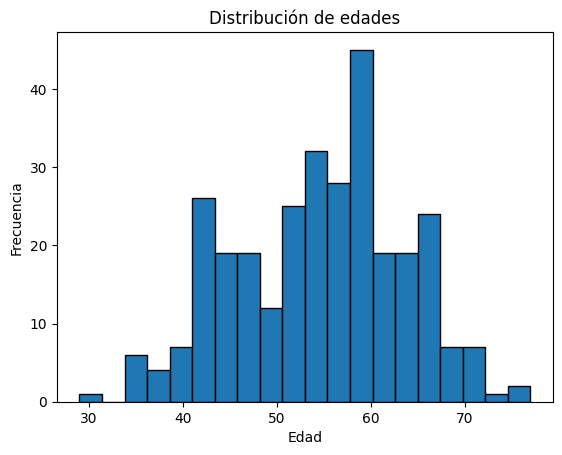

In [51]:
# Histograma simple
df["age"].plot(kind='hist', bins=20, edgecolor='black')
plt.title("Distribuci√≥n de edades")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()


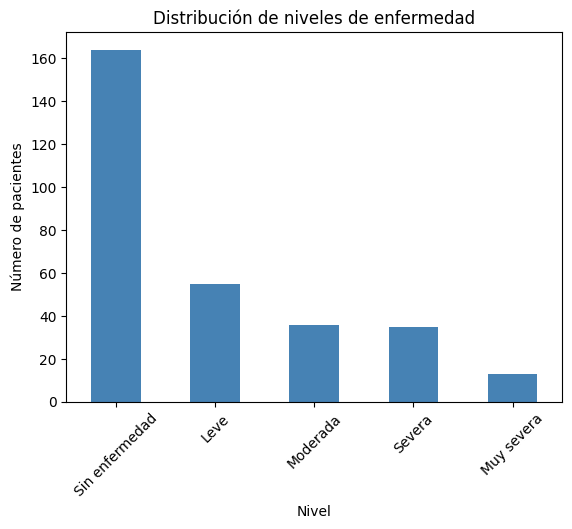

In [52]:
# Gr√°fico de barras
df["nivel_enfermedad"].value_counts().plot(kind='bar', color='steelblue')
plt.title("Distribuci√≥n de niveles de enfermedad")
plt.xlabel("Nivel")
plt.ylabel("N√∫mero de pacientes")
plt.xticks(rotation=45)
plt.show()


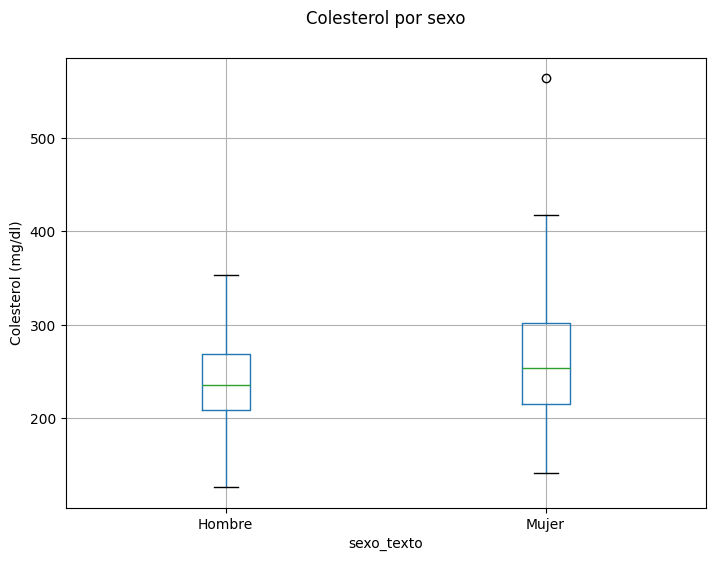

In [53]:
# Box plot para ver distribuci√≥n y outliers
df.boxplot(column='chol', by='sexo_texto', figsize=(8, 6))
plt.suptitle("Colesterol por sexo")
plt.title("")
plt.ylabel("Colesterol (mg/dl)")
plt.show()


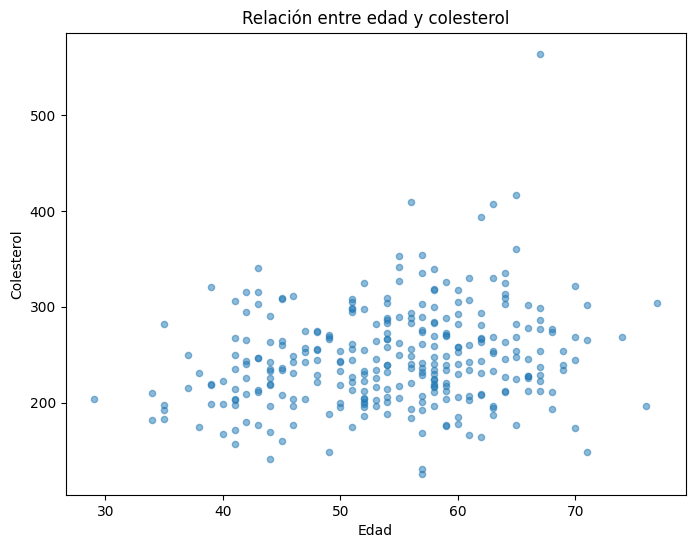

In [54]:
# Scatter plot para ver relaciones
df.plot(kind='scatter', x='age', y='chol', alpha=0.5, figsize=(8, 6))
plt.title("Relaci√≥n entre edad y colesterol")
plt.xlabel("Edad")
plt.ylabel("Colesterol")
plt.show()


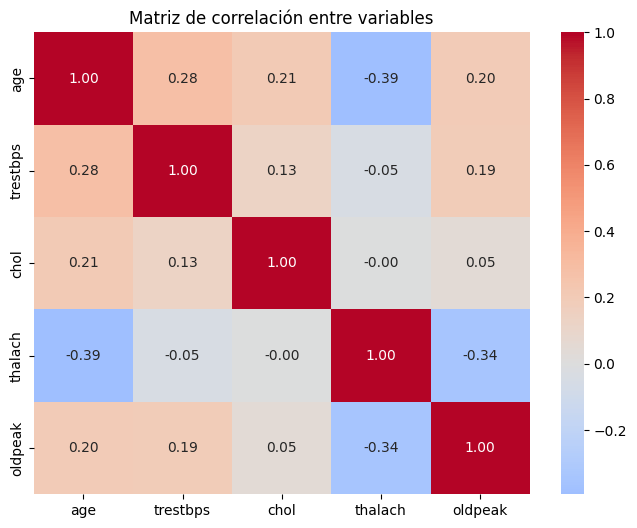

In [55]:
# Matriz de correlaci√≥n con heatmap
correlacion = df[["age", "trestbps", "chol", "thalach", "oldpeak"]].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlacion, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title("Matriz de correlaci√≥n entre variables")
plt.show()


/var/folders/hj/z81bpvv52rxg939nrr4_8qp00000gn/T/ipykernel_84191/4028355435.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tendencia = df.groupby("grupo_edad")["chol"].mean().sort_index()


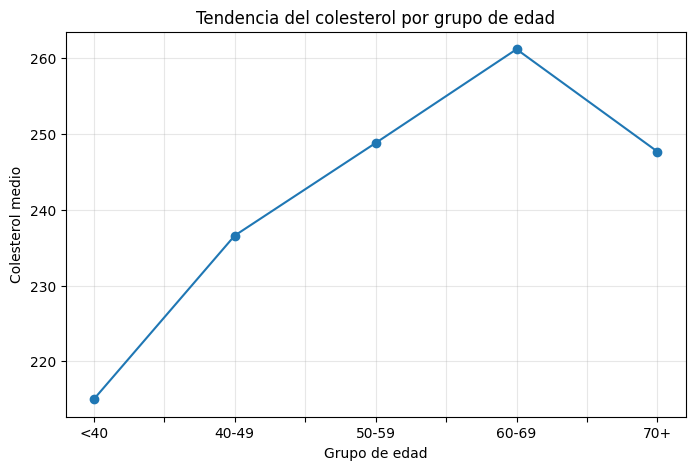

In [56]:
# Gr√°fico de l√≠neas para tendencias
tendencia = df.groupby("grupo_edad")["chol"].mean().sort_index()
tendencia.plot(kind='line', marker='o', figsize=(8, 5))
plt.title("Tendencia del colesterol por grupo de edad")
plt.xlabel("Grupo de edad")
plt.ylabel("Colesterol medio")
plt.grid(True, alpha=0.3)
plt.show()


  ## 9. Guardar los resultados



  Despu√©s de procesar los datos, necesitamos guardar los resultados.

In [57]:
# Guardar el DataFrame modificado en CSV
df_limpio.to_csv("heart_disease_procesado.csv", index=False)
"Archivo guardado como 'heart_disease_procesado.csv'"


"Archivo guardado como 'heart_disease_procesado.csv'"

In [58]:
# Guardar solo columnas espec√≠ficas
columnas_importantes = ["age", "sexo_texto", "chol", "categoria_colesterol", "nivel_enfermedad"]
df[columnas_importantes].to_csv("heart_disease_resumido.csv", index=False)
"Archivo resumido guardado"


'Archivo resumido guardado'

In [59]:
# Guardar tabla de resumen
resumen_sexo = df.groupby("sexo_texto").agg({
    "age": ["mean", "std"],
    "chol": ["mean", "std"],
    "num": lambda x: (x > 0).mean() * 100  # Porcentaje de enfermos
})
resumen_sexo.round(1)


age        chol            num
            mean  std   mean   std <lambda>
sexo_texto                                 
Hombre      53.8  8.8  239.6  42.6     55.3
Mujer       55.7  9.4  261.8  64.9     25.8

In [60]:
resumen_sexo.to_csv("resumen_por_sexo.csv")
"Tabla de resumen guardada"


'Tabla de resumen guardada'

  ## Ejercicios propuestos



  1. **An√°lisis de presi√≥n arterial**: Crea una nueva columna que clasifique la presi√≥n arterial (`trestbps`) en las siguientes categor√≠as:

     - "Normal": menor a 120

     - "Elevada": entre 120 y 129

     - "Hipertensi√≥n Etapa 1": entre 130 y 139

     - "Hipertensi√≥n Etapa 2": 140 o m√°s



     Luego calcula qu√© porcentaje de pacientes est√° en cada categor√≠a.



  2. **An√°lisis por sexo**:

     - Calcula la media y desviaci√≥n est√°ndar del colesterol para hombres y mujeres por separado

     - Determina qu√© sexo tiene mayor proporci√≥n de pacientes con enfermedad card√≠aca

     - Crea un gr√°fico comparativo



  3. **Identificaci√≥n de pacientes de alto riesgo**:

     - Crea un √≠ndice de riesgo que combine edad > 55, colesterol > 240, y presi√≥n > 140

     - Identifica cu√°ntos pacientes cumplen con al menos 2 de estos criterios

     - Guarda la lista de pacientes de alto riesgo en un archivo separado



  4. **An√°lisis de correlaciones**:

     - Investiga qu√© variables est√°n m√°s correlacionadas con la presencia de enfermedad (`num`)

     - Crea visualizaciones para las 3 correlaciones m√°s fuertes



  5. **Limpieza de datos avanzada**:

     - Identifica posibles valores at√≠picos (outliers) en colesterol y presi√≥n arterial

     - Decide qu√© hacer con ellos (mantener, eliminar, o transformar)

     - Justifica tu decisi√≥n

In [61]:
# Ejemplo de soluci√≥n para el ejercicio 1
def clasificar_presion(valor):
    if pd.isna(valor):
        return "Desconocido"
    elif valor < 120:
        return "Normal"
    elif valor < 130:
        return "Elevada"
    elif valor < 140:
        return "Hipertensi√≥n Etapa 1"
    else:
        return "Hipertensi√≥n Etapa 2"

df["categoria_presion"] = df["trestbps"].apply(clasificar_presion)
df["categoria_presion"].value_counts()


categoria_presion
Hipertensi√≥n Etapa 2    98
Elevada                 75
Hipertensi√≥n Etapa 1    70
Normal                  60
Name: count, dtype: int64

In [62]:
# Porcentajes
df["categoria_presion"].value_counts(normalize=True) * 100


categoria_presion
Hipertensi√≥n Etapa 2    32.343234
Elevada                 24.752475
Hipertensi√≥n Etapa 1    23.102310
Normal                  19.801980
Name: proportion, dtype: float64

  ## Resumen



  En este notebook hemos cubierto las operaciones fundamentales de pandas:



  - **Carga y exploraci√≥n inicial**: Entender la estructura y contenido de los datos

  - **Selecci√≥n y filtrado**: Acceder a subconjuntos espec√≠ficos de datos

  - **Transformaci√≥n**: Crear nuevas variables y modificar existentes

  - **An√°lisis estad√≠stico**: Calcular m√©tricas y encontrar patrones

  - **Agrupaci√≥n**: Resumir datos por categor√≠as

  - **Visualizaci√≥n**: Crear gr√°ficos para entender mejor los datos

  - **Exportaci√≥n**: Guardar los resultados del an√°lisis



  Estos conceptos forman la base para cualquier an√°lisis de datos con Python y pandas. La pr√°ctica constante con diferentes datasets te ayudar√° a dominar estas herramientas.

In [63]:
# Example of confusion matrix demonstration
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Set style for better visualization
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

def create_cancer_screening_example(
    population=10000,
    prevalence=0.005,  # 0.5% prevalence
    sensitivity=0.90,   # 90% sensitivity (true positive rate)
    specificity=0.95    # 95% specificity (true negative rate)
):
    """
    Generate synthetic confusion matrix for cancer screening
    with low prevalence to demonstrate metric importance
    """
    
    # Calculate population splits
    n_cancer = int(population * prevalence)
    n_healthy = population - n_cancer
    
    # Display basic info
    info_str = f"""EJEMPLO: Screening de C√°ncer de P√°ncreas
{'='*50}
Poblaci√≥n total: {population:,} pacientes
Prevalencia: {prevalence*100:.1f}% ({n_cancer} casos reales)
Pacientes sanos: {n_healthy:,}

Caracter√≠sticas del test:
Sensibilidad objetivo: {sensitivity*100:.0f}%
Especificidad objetivo: {specificity*100:.0f}%
"""
    
    # Calculate confusion matrix values
    true_positive = int(n_cancer * sensitivity)
    false_negative = n_cancer - true_positive
    true_negative = int(n_healthy * specificity)
    false_positive = n_healthy - true_negative
    
    # Create confusion matrix
    cm = np.array([[true_positive, false_positive],
                   [false_negative, true_negative]])
    
    # Display formatted confusion matrix
    cm_str = f"""
MATRIZ DE CONFUSI√ìN:
{'='*50}

                    Predicci√≥n
              C√°ncer    No C√°ncer    Total
Realidad
C√°ncer         {true_positive:5d}      {false_negative:5d}     {n_cancer:5d}
No C√°ncer      {false_positive:5d}      {true_negative:5d}     {n_healthy:5d}
Total          {true_positive+false_positive:5d}      {false_negative+true_negative:5d}    {population:5d}
"""
    
    # Calculate metrics
    accuracy = (true_positive + true_negative) / population
    sensitivity_calc = true_positive / n_cancer if n_cancer > 0 else 0
    specificity_calc = true_negative / n_healthy if n_healthy > 0 else 0
    ppv = true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0
    npv = true_negative / (true_negative + false_negative) if (true_negative + false_negative) > 0 else 0
    f1 = 2 * (ppv * sensitivity_calc) / (ppv + sensitivity_calc) if (ppv + sensitivity_calc) > 0 else 0
    
    metrics_str = f"""
{'='*50}
M√âTRICAS DE EVALUACI√ìN:
{'='*50}

‚úì Accuracy: {accuracy*100:.1f}%
  ‚Üí Parece excelente, ¬øverdad?

‚úì Sensibilidad (Recall): {sensitivity_calc*100:.1f}%
  ‚Üí Detectamos {true_positive} de {n_cancer} c√°nceres
  ‚Üí Perdemos {false_negative} pacientes con c√°ncer

‚úì Especificidad: {specificity_calc*100:.1f}%
  ‚Üí Identificamos correctamente {true_negative:,} de {n_healthy:,} sanos
  ‚Üí Generamos {false_positive} falsas alarmas

‚úì Valor Predictivo Positivo (Precision): {ppv*100:.1f}%
  ‚Üí Solo {true_positive} de {true_positive+false_positive} 'positivos' tienen c√°ncer
  ‚Üí ¬°{(1-ppv)*100:.1f}% son falsas alarmas!

‚úì Valor Predictivo Negativo: {npv*100:.2f}%
  ‚Üí Si el test es negativo, casi seguro no hay c√°ncer

‚úì F1-Score: {f1*100:.1f}%
  ‚Üí Balance entre precision y recall
"""
    
    # Comparison with naive classifier
    naive_accuracy = n_healthy / population
    comparison_str = f"""
{'='*50}
COMPARACI√ìN CON CLASIFICADOR NAIVE:
{'='*50}

Si el modelo siempre predice 'No C√°ncer':
‚Ä¢ Accuracy: {naive_accuracy*100:.1f}%
‚Ä¢ Sensibilidad: 0% (no detecta ning√∫n c√°ncer)
‚Ä¢ Especificidad: 100%

‚Üí ¬°Accuracy del {naive_accuracy*100:.1f}% pero completamente in√∫til!
"""
    
    # Clinical impact
    clinical_str = f"""
{'='*50}
IMPACTO CL√çNICO:
{'='*50}

‚Ä¢ Por cada caso real de c√°ncer detectado:
  ‚Üí Se generan {false_positive/true_positive:.1f} falsas alarmas

‚Ä¢ De {true_positive+false_positive} pruebas positivas:
  ‚Üí {false_positive} pacientes sufrir√°n ansiedad innecesaria
  ‚Üí {false_positive} posibles biopsias innecesarias

‚Ä¢ De {n_cancer} casos reales de c√°ncer:
  ‚Üí {false_negative} no ser√°n detectados (potencialmente fatal)
"""
    
    # Create visualization
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # Model confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Predice:\nC√°ncer', 'Predice:\nNo C√°ncer'],
                yticklabels=['Real:\nC√°ncer', 'Real:\nNo C√°ncer'],
                ax=axes[0,0], cbar_kws={'label': 'N√∫mero de casos'},
                annot_kws={'size': 14})
    axes[0,0].set_title('Modelo ML Entrenado - Matriz de Confusi√≥n', fontsize=14, fontweight='bold')
    axes[0,0].set_ylabel('Realidad', fontsize=12)
    axes[0,0].set_xlabel('Predicci√≥n', fontsize=12)
    
    # Model metrics
    metrics_names = ['Accuracy', 'Sensibilidad', 'Especificidad', 'VPP', 'VPN', 'F1-Score']
    metrics_values = [accuracy*100, sensitivity_calc*100, specificity_calc*100, 
                     ppv*100, npv*100, f1*100]
    colors = ['green' if v > 90 else 'orange' if v > 50 else 'red' for v in metrics_values]
    
    bars1 = axes[0,1].barh(metrics_names, metrics_values, color=colors, alpha=0.7)
    axes[0,1].set_title('Modelo ML Entrenado - M√©tricas', fontsize=14, fontweight='bold')
    axes[0,1].set_xlabel('Porcentaje (%)', fontsize=12)
    axes[0,1].set_xlim(0, 105)
    
    for bar, value in zip(bars1, metrics_values):
        axes[0,1].text(value + 1, bar.get_y() + bar.get_height()/2, 
                      f'{value:.1f}%', ha='left', va='center', fontsize=11, fontweight='bold')
    
    # Naive model confusion matrix
    cm_naive = np.array([[0, 0], [n_cancer, n_healthy]])
    
    sns.heatmap(cm_naive, annot=True, fmt='d', cmap='Reds', 
                xticklabels=['Predice:\nC√°ncer', 'Predice:\nNo C√°ncer'],
                yticklabels=['Real:\nC√°ncer', 'Real:\nNo C√°ncer'],
                ax=axes[1,0], cbar_kws={'label': 'N√∫mero de casos'},
                annot_kws={'size': 14})
    axes[1,0].set_title('Modelo Naive (siempre "No C√°ncer") - Matriz de Confusi√≥n', 
                        fontsize=14, fontweight='bold')
    axes[1,0].set_ylabel('Realidad', fontsize=12)
    axes[1,0].set_xlabel('Predicci√≥n', fontsize=12)
    
    # Naive metrics
    naive_values = [naive_accuracy*100, 0, 100, 0, n_healthy/(n_healthy+n_cancer)*100, 0]
    colors_naive = ['orange' if v > 90 else 'red' if v > 50 else 'darkred' for v in naive_values]
    
    bars2 = axes[1,1].barh(metrics_names, naive_values, color=colors_naive, alpha=0.7)
    axes[1,1].set_title('Modelo Naive (siempre "No C√°ncer") - M√©tricas', 
                        fontsize=14, fontweight='bold')
    axes[1,1].set_xlabel('Porcentaje (%)', fontsize=12)
    axes[1,1].set_xlim(0, 105)
    
    for bar, value in zip(bars2, naive_values):
        if value > 0:
            axes[1,1].text(value + 1, bar.get_y() + bar.get_height()/2, 
                          f'{value:.1f}%', ha='left', va='center', fontsize=11, fontweight='bold')
        else:
            axes[1,1].text(2, bar.get_y() + bar.get_height()/2, 
                          '0%', ha='left', va='center', fontsize=11, fontweight='bold', color='darkred')
    
    plt.suptitle(f'¬øPor qu√© Accuracy no es suficiente?\nC√°ncer con prevalencia {prevalence*100:.1f}%', 
                 fontsize=16, fontweight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()
    
    # Final comparison
    final_str = f"""
{'='*60}
COMPARACI√ìN CR√çTICA:
{'='*60}
Modelo ML:    Accuracy={accuracy*100:.1f}%, Detecta {true_positive}/{n_cancer} c√°nceres
Modelo Naive: Accuracy={naive_accuracy:.1f}%, Detecta 0/{n_cancer} c√°nceres

‚Üí ¬°El modelo naive tiene mayor accuracy pero es in√∫til!
‚Üí No detecta ning√∫n c√°ncer (sensibilidad = 0%)
"""
    
    # Return all strings for display
    return (info_str + cm_str + metrics_str + comparison_str + 
            clinical_str + final_str), cm, {
        'accuracy': accuracy,
        'sensitivity': sensitivity_calc,
        'specificity': specificity_calc,
        'ppv': ppv,
        'npv': npv,
        'f1': f1
    }

# Bonus demonstration: Why accuracy isn't enough
"Ejecutando demostraci√≥n de por qu√© accuracy no es suficiente..."


'Ejecutando demostraci√≥n de por qu√© accuracy no es suficiente...'

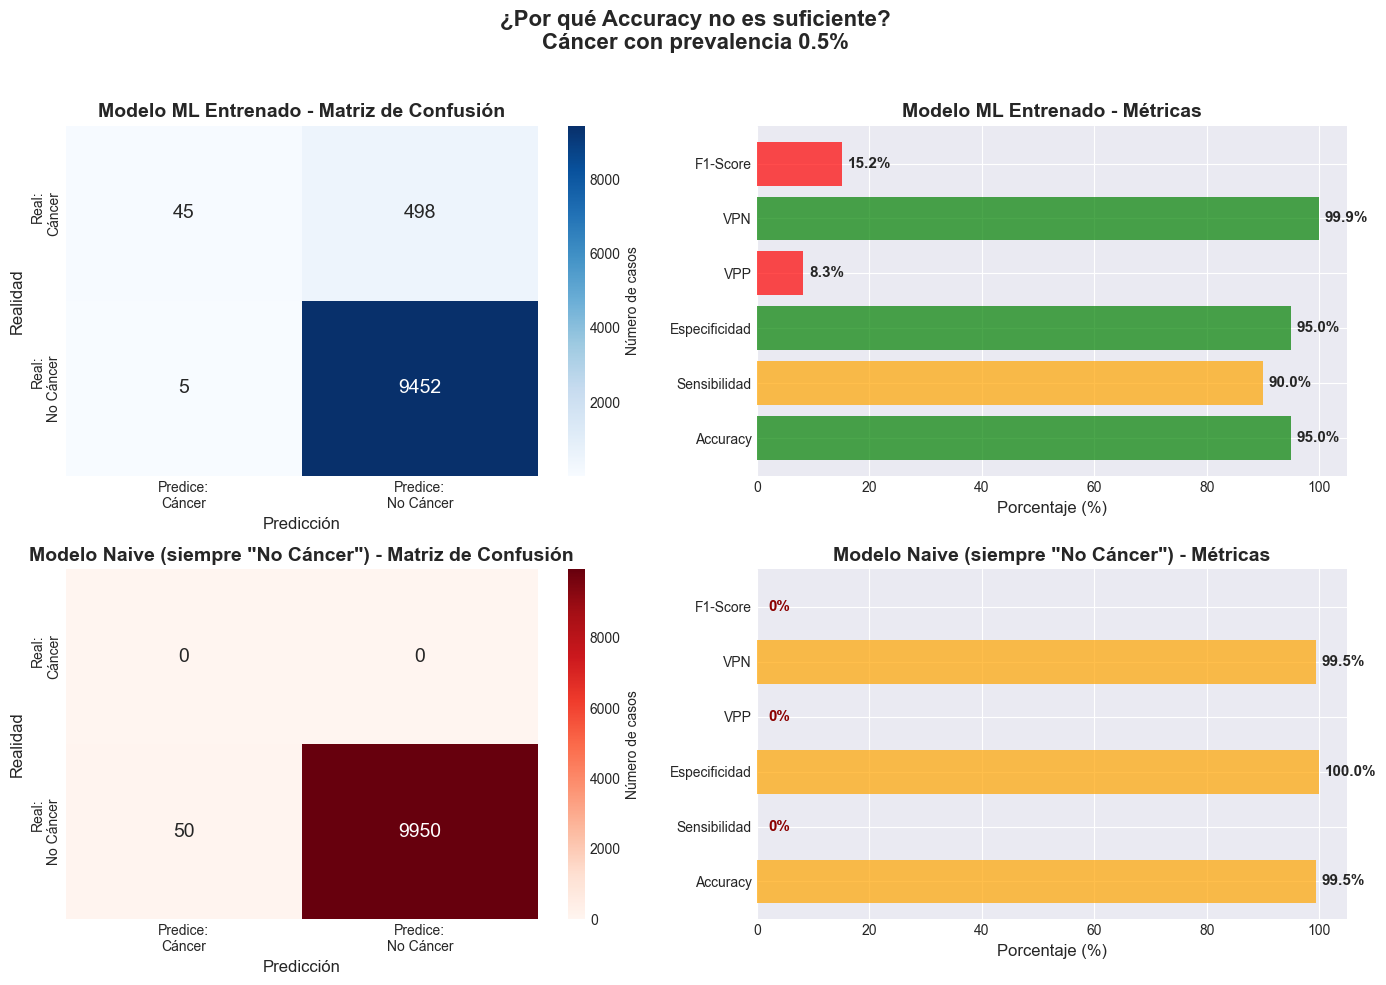

In [64]:
# Generate and display the cancer screening example
result_text, cm, metrics = create_cancer_screening_example()


In [65]:
# Show threshold comparison
def compare_thresholds():
    """Show how different thresholds affect metrics"""
    scenarios = [
        ("Conservador (umbral alto)", 0.70, 0.99),
        ("Balanceado (umbral medio)", 0.90, 0.95),
        ("Agresivo (umbral bajo)", 0.99, 0.80)
    ]
    
    results = []
    for name, sens, spec in scenarios:
        tp = int(50 * sens)
        fn = 50 - tp
        tn = int(9950 * spec)
        fp = 9950 - tn
        
        acc = (tp + tn) / 10000
        ppv = tp / (tp + fp) if (tp + fp) > 0 else 0
        
        results.append({
            'Escenario': name,
            'Sensibilidad': f"{sens*100:.0f}%",
            'Especificidad': f"{spec*100:.0f}%",
            'Detecta_Cancer': f"{tp}/50",
            'Falsas_Alarmas': fp,
            'VPP': f"{ppv*100:.1f}%"
        })
    
    return pd.DataFrame(results)

compare_thresholds()


Escenario Sensibilidad Especificidad Detecta_Cancer  \
0  Conservador (umbral alto)          70%           99%          35/50   
1  Balanceado (umbral medio)          90%           95%          45/50   
2     Agresivo (umbral bajo)          99%           80%          49/50   

   Falsas_Alarmas    VPP  
0             100  25.9%  
1             498   8.3%  
2            1990   2.4%

In [66]:
# Key takeaways for students
takeaways = """
PUNTOS CLAVE APRENDIDOS EN ESTE NOTEBOOK:

üìä PANDAS FUNDAMENTALS:
‚Ä¢ Cargar, explorar y entender datasets m√©dicos
‚Ä¢ Seleccionar, filtrar y transformar datos eficientemente
‚Ä¢ Crear nuevas variables y categor√≠as
‚Ä¢ Manejar valores nulos apropiadamente
‚Ä¢ Agrupar y resumir informaci√≥n por categor√≠as
‚Ä¢ Visualizar patrones en los datos
‚Ä¢ Exportar resultados para uso posterior

üè• APLICACI√ìN M√âDICA:
‚Ä¢ An√°lisis de factores de riesgo cardiovascular
‚Ä¢ Categorizaci√≥n de pacientes por variables cl√≠nicas
‚Ä¢ Identificaci√≥n de patrones en datos de salud
‚Ä¢ Creaci√≥n de √≠ndices de riesgo personalizados

üìà M√âTRICAS Y EVALUACI√ìN:
‚Ä¢ Por qu√© accuracy puede ser enga√±oso
‚Ä¢ Importancia de sensibilidad vs especificidad
‚Ä¢ Valor predictivo positivo en screening
‚Ä¢ Impacto cl√≠nico de falsos positivos/negativos

üîß PR√ìXIMOS PASOS:
‚Ä¢ Practicar con otros datasets m√©dicos
‚Ä¢ Explorar visualizaciones m√°s avanzadas
‚Ä¢ Aprender t√©cnicas de machine learning
‚Ä¢ Desarrollar dashboards interactivos
"""

takeaways

'\nPUNTOS CLAVE APRENDIDOS EN ESTE NOTEBOOK:\n\nüìä PANDAS FUNDAMENTALS:\n‚Ä¢ Cargar, explorar y entender datasets m√©dicos\n‚Ä¢ Seleccionar, filtrar y transformar datos eficientemente\n‚Ä¢ Crear nuevas variables y categor√≠as\n‚Ä¢ Manejar valores nulos apropiadamente\n‚Ä¢ Agrupar y resumir informaci√≥n por categor√≠as\n‚Ä¢ Visualizar patrones en los datos\n‚Ä¢ Exportar resultados para uso posterior\n\nüè• APLICACI√ìN M√âDICA:\n‚Ä¢ An√°lisis de factores de riesgo cardiovascular\n‚Ä¢ Categorizaci√≥n de pacientes por variables cl√≠nicas\n‚Ä¢ Identificaci√≥n de patrones en datos de salud\n‚Ä¢ Creaci√≥n de √≠ndices de riesgo personalizados\n\nüìà M√âTRICAS Y EVALUACI√ìN:\n‚Ä¢ Por qu√© accuracy puede ser enga√±oso\n‚Ä¢ Importancia de sensibilidad vs especificidad\n‚Ä¢ Valor predictivo positivo en screening\n‚Ä¢ Impacto cl√≠nico de falsos positivos/negativos\n\nüîß PR√ìXIMOS PASOS:\n‚Ä¢ Practicar con otros datasets m√©dicos\n‚Ä¢ Explorar visualizaciones m√°s avanzadas\n‚Ä¢ Aprender t√©cn